In [1]:
print("Hello, Somayeh! Your Jupyter Notebook is working 🎉")



Hello, Somayeh! Your Jupyter Notebook is working 🎉


In [2]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import os
print(os.getcwd())


/content


In [7]:
import os
print(os.getcwd())


/content


In [8]:
import os
print(os.getcwd())


/content


In [9]:
from google.colab import files
uploaded = files.upload()


Saving  Image 1 Aug 29, 2025 at 10_46_09 PM.jpeg to  Image 1 Aug 29, 2025 at 10_46_09 PM.jpeg


In [10]:
import cv2
import matplotlib.pyplot as plt

# put the exact file name here
img = cv2.imread("Image 1 Aug 29, 2025 at 10_46_09 PM.jpeg")

# convert colors and show it
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [11]:
img = cv2.imread("Image 1 Aug 29, 2025 at 10_46_09 PM.jpeg")


In [12]:
img = cv2.imread("cat.jpg")   # or your new file name
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [13]:
import os
print(os.listdir())


['.config', ' Image 1 Aug 29, 2025 at 10_46_09 PM.jpeg', 'drive', 'sample_data']


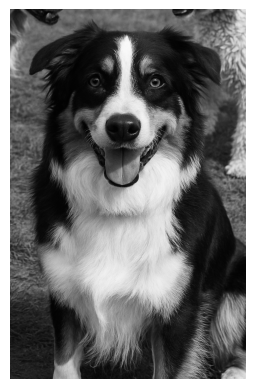

In [14]:
import os

# rename the file
os.rename(" Image 1 Aug 29, 2025 at 10_46_09 PM.jpeg", "myimage.jpg")

# now load it with a simple name
img = cv2.imread("myimage.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [15]:
print("Shape:", img.shape)   # rows, cols, channels
print("Data type:", img.dtype)
print("Pixel range:", img.min(), "to", img.max())


Shape: (863, 551, 3)
Data type: uint8
Pixel range: 0 to 254


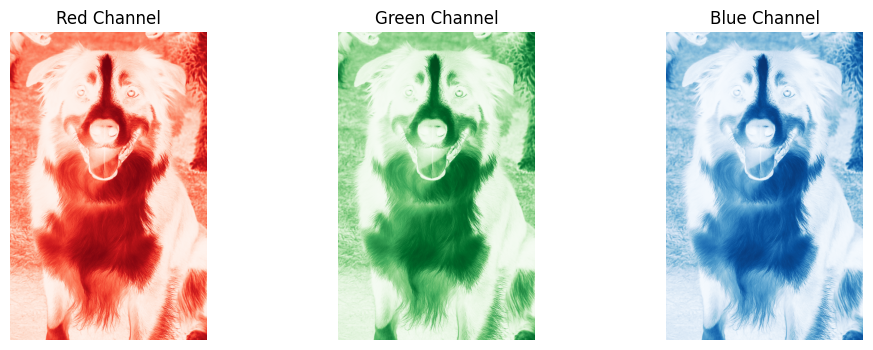

In [16]:
# Split into channels
b, g, r = cv2.split(img)

# Show them
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(r, cmap="Reds"); plt.title("Red Channel"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(g, cmap="Greens"); plt.title("Green Channel"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(b, cmap="Blues"); plt.title("Blue Channel"); plt.axis("off")
plt.show()


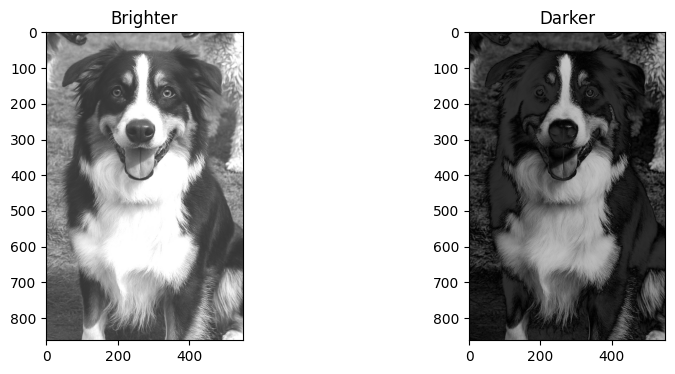

In [17]:
def adjust_brightness(image, value):
    return cv2.convertScaleAbs(image, alpha=1, beta=value)

brighter = adjust_brightness(img, 50)
darker = adjust_brightness(img, -50)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(brighter, cv2.COLOR_BGR2RGB)); plt.title("Brighter")
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(darker, cv2.COLOR_BGR2RGB)); plt.title("Darker")
plt.show()


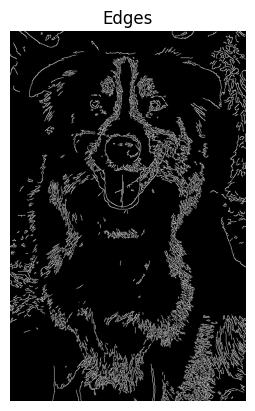

In [18]:
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges, cmap="gray")
plt.title("Edges")
plt.axis("off")
plt.show()


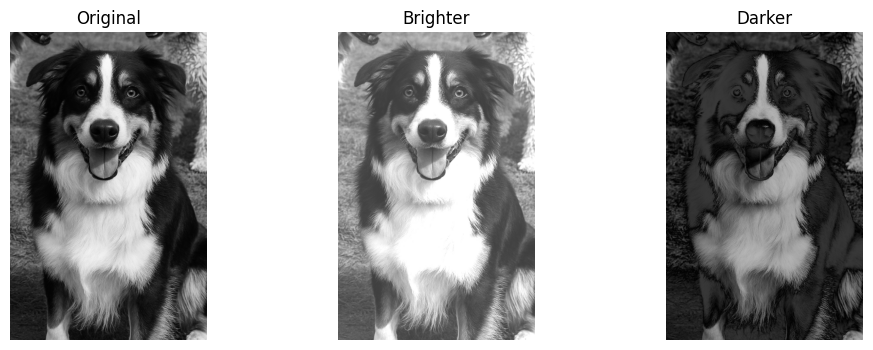

In [19]:
import cv2
import matplotlib.pyplot as plt

def adjust_brightness(image, value):
    return cv2.convertScaleAbs(image, alpha=1, beta=value)

# Make image brighter and darker
brighter = adjust_brightness(img, 60)   # +60 brightness
darker = adjust_brightness(img, -60)   # -60 brightness

# Show results
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(brighter, cv2.COLOR_BGR2RGB)); plt.title("Brighter"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(darker, cv2.COLOR_BGR2RGB)); plt.title("Darker"); plt.axis("off")
plt.show()


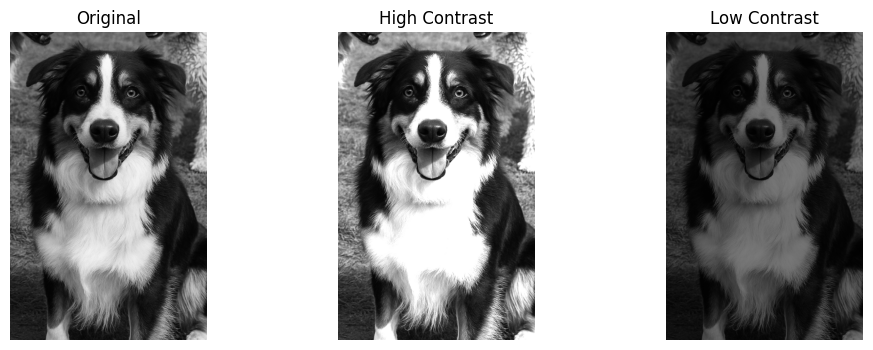

In [20]:
def adjust_contrast(image, factor):
    return cv2.convertScaleAbs(image, alpha=factor, beta=0)

# Increase and decrease contrast
high_contrast = adjust_contrast(img, 1.5)   # stronger contrast
low_contrast  = adjust_contrast(img, 0.5)   # weaker contrast

# Show results
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(high_contrast, cv2.COLOR_BGR2RGB)); plt.title("High Contrast"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(low_contrast, cv2.COLOR_BGR2RGB)); plt.title("Low Contrast"); plt.axis("off")
plt.show()


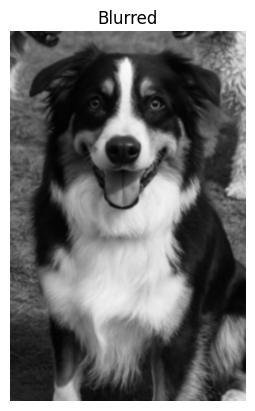

In [21]:
blurred = cv2.GaussianBlur(img, (9,9), 0)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title("Blurred")
plt.axis("off")
plt.show()


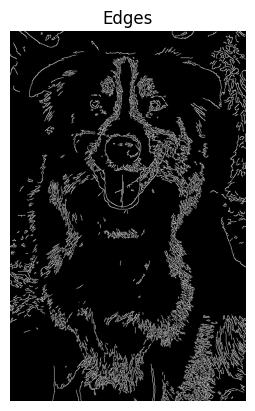

In [22]:
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges, cmap="gray")
plt.title("Edges")
plt.axis("off")
plt.show()


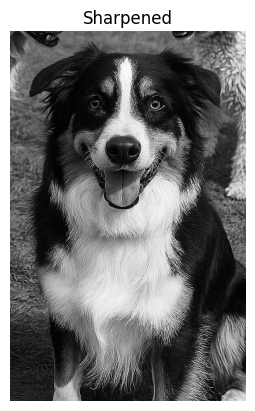

In [23]:
import numpy as np

# Sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

sharpened = cv2.filter2D(img, -1, kernel)

plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.title("Sharpened")
plt.axis("off")
plt.show()
